# Data Understanding

### 1. Building the Dataframe

In [46]:
import pandas as pd
import os
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

Insert TMDB_tv_dataset_v3.csv to the files section of the Google Colab for access.

In [47]:
TMDB_filename = os.path.join(os.getcwd(), "TMDB_tv_dataset_v3.csv")
df = pd.read_csv(TMDB_filename)

### 2. Basic Exploration of TMDB Data

In [48]:
#dataframe shape
df.shape

(168639, 29)

In [49]:
#first few rows:
display(df.head())

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45


In [50]:
#last few rows:
display(df.tail())

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
168634,239099,母乳酱想要喷出来,1,1,zh,0,0.0,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,CN,NaN,NaN,NaN,0
168635,241205,Barbie Dream Squad,1,1,es,0,0.0,NaN,False,NaN,...,NaN,NaN,"Dee Shipley, Blair Davidson",NaN,NaN,US,NaN,NaN,NaN,0
168636,240696,Picasso,1,1,bn,0,0.0,"Murder, art and a journalist's relentless ques...",False,/fseBBbvHtdcZS5M7bSjOxYsVe5.jpg,...,NaN,Crime,NaN,bn,NaN,IN,বাংলা,NaN,India,0
168637,240697,女子大生危険なアルバイト,1,1,en,0,0.0,A college student gets into trouble when she m...,False,NaN,...,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,0
168638,237566,Welcome to My World,1,5,en,0,0.0,Short-lives series on Youtube Red.,False,NaN,...,NaN,NaN,Paul Vandervort,NaN,NaN,US,NaN,YouTube Red,United States of America,0


In [51]:
# display basic statistics of numeric columns
display(df.describe())

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
count,168639.000000,168639.000000,168639.000000,168639.000000,168639.000000,168639.000000,168639.000000
mean,111307.074704,1.548497,24.465082,13.305054,2.333843,5.882644,22.603348
std,76451.662352,2.942872,134.799622,190.809059,3.454334,42.023216,47.950427
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45936.500000,1.000000,1.000000,0.000000,0.000000,0.600000,0.000000
50%,97734.000000,1.000000,6.000000,0.000000,0.000000,0.857000,0.000000
75%,196923.500000,1.000000,20.000000,1.000000,6.000000,2.431500,42.000000
max,251213.000000,240.000000,20839.000000,21857.000000,10.000000,3707.008000,6032.000000


In [52]:
# display info about DataFrame
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168639 entries, 0 to 168638
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    168639 non-null  int64  
 1   name                  168634 non-null  object 
 2   number_of_seasons     168639 non-null  int64  
 3   number_of_episodes    168639 non-null  int64  
 4   original_language     168639 non-null  object 
 5   vote_count            168639 non-null  int64  
 6   vote_average          168639 non-null  float64
 7   overview              93333 non-null   object 
 8   adult                 168639 non-null  bool   
 9   backdrop_path         77780 non-null   object 
 10  first_air_date        136903 non-null  object 
 11  last_air_date         138735 non-null  object 
 12  homepage              50998 non-null   object 
 13  in_production         168639 non-null  bool   
 14  original_name         168634 non-null  object 
 15  

None

In [53]:
#identifying features
df.columns.tolist()

['id',
 'name',
 'number_of_seasons',
 'number_of_episodes',
 'original_language',
 'vote_count',
 'vote_average',
 'overview',
 'adult',
 'backdrop_path',
 'first_air_date',
 'last_air_date',
 'homepage',
 'in_production',
 'original_name',
 'popularity',
 'poster_path',
 'type',
 'status',
 'tagline',
 'genres',
 'created_by',
 'languages',
 'networks',
 'origin_country',
 'spoken_languages',
 'production_companies',
 'production_countries',
 'episode_run_time']

# Data Preprocessing

### Handle Missing Values  

In [54]:
# Inspect the structure of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168639 entries, 0 to 168638
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    168639 non-null  int64  
 1   name                  168634 non-null  object 
 2   number_of_seasons     168639 non-null  int64  
 3   number_of_episodes    168639 non-null  int64  
 4   original_language     168639 non-null  object 
 5   vote_count            168639 non-null  int64  
 6   vote_average          168639 non-null  float64
 7   overview              93333 non-null   object 
 8   adult                 168639 non-null  bool   
 9   backdrop_path         77780 non-null   object 
 10  first_air_date        136903 non-null  object 
 11  last_air_date         138735 non-null  object 
 12  homepage              50998 non-null   object 
 13  in_production         168639 non-null  bool   
 14  original_name         168634 non-null  object 
 15  

In [55]:
# Check for missing values
print(df.isnull().sum())

id                           0
name                         5
number_of_seasons            0
number_of_episodes           0
original_language            0
vote_count                   0
vote_average                 0
overview                 75306
adult                        0
backdrop_path            90859
first_air_date           31736
last_air_date            29904
homepage                117641
in_production                0
original_name                5
popularity                   0
poster_path              59902
type                         0
status                       0
tagline                 163309
genres                   68926
created_by              132143
languages                58589
networks                 71050
origin_country           31030
spoken_languages         59359
production_companies    109297
production_countries     91128
episode_run_time             0
dtype: int64


In [56]:
# Verify the data types of all columns
print(df.dtypes)

id                        int64
name                     object
number_of_seasons         int64
number_of_episodes        int64
original_language        object
vote_count                int64
vote_average            float64
overview                 object
adult                      bool
backdrop_path            object
first_air_date           object
last_air_date            object
homepage                 object
in_production              bool
original_name            object
popularity              float64
poster_path              object
type                     object
status                   object
tagline                  object
genres                   object
created_by               object
languages                object
networks                 object
origin_country           object
spoken_languages         object
production_companies     object
production_countries     object
episode_run_time          int64
dtype: object


In [57]:
# Fill missing values for numerical columns with mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [58]:
'''
the changes I made here are that I filter out the 'object' data types and then check to see if it is not the
'genres' column. if it is not, then I add it to the 'columns_to_fill" list. this is because I am labeling
shows without a genre as 'Unknown' in the one-hot encoding step. then after that, I apply the mode of the
specific column to the missing value for now.
'''

categorical_cols = df.select_dtypes(include=['object']).columns
columns_to_fill = [col for col in categorical_cols if col != 'genres']
df[columns_to_fill] = df[columns_to_fill].apply(lambda col: col.fillna(col.mode()[0]))

In [59]:
# Verify that there are no missing values
print(df.isnull().sum())

id                          0
name                        0
number_of_seasons           0
number_of_episodes          0
original_language           0
vote_count                  0
vote_average                0
overview                    0
adult                       0
backdrop_path               0
first_air_date              0
last_air_date               0
homepage                    0
in_production               0
original_name               0
popularity                  0
poster_path                 0
type                        0
status                      0
tagline                     0
genres                  68926
created_by                  0
languages                   0
networks                    0
origin_country              0
spoken_languages            0
production_companies        0
production_countries        0
episode_run_time            0
dtype: int64


### Remove Duplicates  

1,580 rows of data were removed due to it being a duplicate row.

In [60]:
# Check how many duplicates are there
num_duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 1580


In [61]:
# Remove duplicates
df = df.drop_duplicates()

In [62]:
num_duplicates_after = df.duplicated().sum()
print(f"Number of duplicates after removing: {num_duplicates_after}")

Number of duplicates after removing: 0


### Clean Text Data

In [63]:
'''
I made some notes on how to get nltk to work on your enviroment, I know that this has worked on VS Code
on macOS so if that is the enviroment and OS that you are using this should work. I hope it helps!

how to install nltk:
1. make sure you are working in a virtual enviroment when working on vs code, also
ensure you have python installed with the following command:
python --version

2. on macos, run this command to create the virtual enviroment:
python3 -m venv myenv

3. then activate the virtual enviroment with this command:
source myenv/bin/activate

4. then you can install packages like nltk with this command:
pip install nltk

5. once you have done this, check to see if nltk have been dowloaded with this command:
pip list
nltk should show up in the list

6. then in the terminal type in 'python3', then 'import nltk', then nltk.__version__, this will help
ensure that nltk is installed

7. then I ensured I have actually activated the virtual enviroment with this command, this
will be different depending on which directory your enviroment is located:
source /Users/safiaboutaleb/Developer/directv_tvrec/myenv/bin/activate

8. then I tried to reinstall the certificates with this command for nltk to finally work:
/Applications/Python\ 3.11/Install\ Certificates.command

The following lines of code below here are needed to install the nessesary components of nltk,
once you run this once, you can delete these lines of code because they will have already been installed:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

yt video that helped a bit:
https://www.youtube.com/watch?v=85Xr0UGR8qQ
'''

"\nI made some notes on how to get nltk to work on your enviroment, I know that this has worked on VS Code\non macOS so if that is the enviroment and OS that you are using this should work. I hope it helps!\n\nhow to install nltk:\n1. make sure you are working in a virtual enviroment when working on vs code, also\nensure you have python installed with the following command:\npython --version\n\n2. on macos, run this command to create the virtual enviroment:\npython3 -m venv myenv\n\n3. then activate the virtual enviroment with this command:\nsource myenv/bin/activate\n\n4. then you can install packages like nltk with this command:\npip install nltk\n\n5. once you have done this, check to see if nltk have been dowloaded with this command:\npip list\nnltk should show up in the list\n\n6. then in the terminal type in 'python3', then 'import nltk', then nltk.__version__, this will help\nensure that nltk is installed\n\n7. then I ensured I have actually activated the virtual enviroment with

In [64]:
'''
clean text function to convert text to lowercase, remove special characters
(punctuation, numbers, etc.), remove stop words, tokenize, and apply lemmatization
'''

def clean_text(text):
  text = text.lower()

  text = re.sub(r'[^a-zA-Z\s]', '', text)

  tokens = word_tokenize(text)

  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]

  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens]

  cleaned_text = ' '.join(tokens)

  return cleaned_text

In [65]:
'''
now we use the clean_text function on the overview column
'''
df['cleaned_overview'] = df['overview'].apply(lambda x: clean_text(x) if pd.notnull(x) else '')

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/serenakim/nltk_data'
    - '/Users/serenakim/directv_tvrec/.conda/nltk_data'
    - '/Users/serenakim/directv_tvrec/.conda/share/nltk_data'
    - '/Users/serenakim/directv_tvrec/.conda/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
print(df['cleaned_overview'][0])
print(df['overview'][0])

seven noble family fight control mythical land westeros friction house lead fullscale war ancient evil awakens farthest north amidst war neglected military order misfit night watch stand realm men icy horror beyond
Seven noble families fight for control of the mythical land of Westeros. Friction between the houses leads to full-scale war. All while a very ancient evil awakens in the farthest north. Amidst the war, a neglected military order of misfits, the Night's Watch, is all that stands between the realms of men and icy horrors beyond.


In [ ]:
df = df.drop('overview', axis=1) # drop the original 'overview' column and save the chagnes to the csv file
df.to_csv('TMDB_tv_dataset_v3.csv', index=False)

### Normalize/Standardize Numeric Data

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,adult,backdrop_path,first_air_date,...,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time,cleaned_overview
0,0.005565,Game of Thrones,0.033333,0.003503,en,1.000000,0.8442,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,2011-04-17,...,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0.000000,seven noble family fight control mythical land...
1,0.284401,Money Heist,0.012500,0.001967,es,0.816031,0.8257,False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,2017-05-02,...,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,0.011605,carry biggest heist history mysterious man cal...
2,0.265636,Stranger Things,0.016667,0.001632,en,0.739397,0.8624,False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,2016-07-15,...,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0.000000,young boy vanishes small town uncovers mystery...
3,0.005577,The Walking Dead,0.045833,0.008494,en,0.706044,0.8121,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,2010-10-31,...,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,0.006963,sheriff deputy rick grime awakens coma find po...
4,0.251473,Lucifer,0.025000,0.004463,en,0.634579,0.8486,False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,2016-01-25,...,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,0.007460,bored unhappy lord hell lucifer morningstar ab...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168634,0.951778,母乳酱想要喷出来,0.004167,0.000048,zh,0.000000,0.0000,False,/rYLnnA0GBXATn8kMXCNY0r8mA8Q.jpg,2023-03-03,...,NaN,Shotaro Ishinomori,en,BBC One,CN,English,TVB,Japan,0.000000,thai drama
168635,0.960161,Barbie Dream Squad,0.004167,0.000048,es,0.000000,0.0000,False,/rYLnnA0GBXATn8kMXCNY0r8mA8Q.jpg,2015-01-01,...,NaN,"Dee Shipley, Blair Davidson",en,BBC One,US,English,TVB,Japan,0.000000,thai drama
168636,0.958135,Picasso,0.004167,0.000048,bn,0.000000,0.0000,False,/fseBBbvHtdcZS5M7bSjOxYsVe5.jpg,2023-11-30,...,Crime,Shotaro Ishinomori,bn,BBC One,IN,বাংলা,TVB,India,0.000000,murder art journalist relentless quest answer ...
168637,0.958139,女子大生危険なアルバイト,0.004167,0.000048,en,0.000000,0.0000,False,/rYLnnA0GBXATn8kMXCNY0r8mA8Q.jpg,1990-02-10,...,NaN,Shotaro Ishinomori,en,BBC One,US,English,TVB,Japan,0.000000,college student get trouble move mansion wealt...


### One-Hot Encoding of Categorical Features

* Genre One-Hot Encoding

In [ ]:
'''
my plan here is to just split each genre as a token by using the comma as a delimiter, then find all
of the unique genres, and then one-hot encode them so I can drop the original genres column
'''

df['genres'] = df['genres'].fillna('Unknown') # for genres that are empty just call them Unknown

df['genres'] = df['genres'].apply(lambda x: x.split(', '))

unique_genres = sorted(set(genre for genres in df['genres'] for genre in genres))

for genre in unique_genres:
  df[genre] = df['genres'].apply(lambda genres: int(genre in genres))

df = df.drop('genres', axis=1)

In [ ]:
# now here I can save the modifications to the csv file
df.to_csv('TMDB_tv_dataset_v3.csv', index=False)

* Rest of the One-Hot Encoding

In [ ]:
# Creating a list of all columns with object values and inspecting their unique values
list = df.select_dtypes(include=['object']).columns.tolist()
print(df[list].nunique())

name                    155586
original_language          106
backdrop_path            76300
first_air_date           18286
last_air_date            18705
homepage                 49758
original_name           157313
poster_path             106050
type                         7
status                       6
tagline                   5267
created_by               26081
languages                 1113
networks                  8196
origin_country             792
spoken_languages           946
production_companies     27132
production_countries      1247
cleaned_overview         91026
dtype: int64


In [ ]:
# Columns not included are name, overview, backdrop_path, homepage, original_name, poster_path, tagline, languages, spoken_languages,production_countries, and cleaned_overview
encode_cols =['original_language','type', 'status','created_by','networks','origin_country','production_companies']

In [ ]:
# Creating a list of the top 20 values in the original_language column
top_20_original_language = df['original_language'].value_counts(ascending = False).head(20).index.tolist()
top_20_original_language

['en',
 'zh',
 'ja',
 'ko',
 'de',
 'fr',
 'es',
 'pt',
 'ru',
 'nl',
 'ar',
 'da',
 'cn',
 'th',
 'tr',
 'it',
 'hi',
 'sv',
 'cs',
 'no']

In [ ]:
# Creating one-hot encoded columns for original_language
for i in top_20_original_language:
    name = 'original-language_' + i
    df[name] = np.where(df['original_language'] == i, 1, 0)

In [ ]:
# Removing the original_language column from df and encode_cols
df.drop(columns = ['original_language'], inplace = True)
encode_cols.remove('original_language')
df.columns

Index(['id', 'name', 'number_of_seasons', 'number_of_episodes', 'vote_count',
       'vote_average', 'adult', 'backdrop_path', 'first_air_date',
       'last_air_date', 'homepage', 'in_production', 'original_name',
       'popularity', 'poster_path', 'type', 'status', 'tagline', 'created_by',
       'languages', 'networks', 'origin_country', 'spoken_languages',
       'production_companies', 'production_countries', 'episode_run_time',
       'cleaned_overview', 'Action & Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'History', 'Kids', 'Music',
       'Musical', 'Mystery', 'News', 'Reality', 'Romance', 'Sci-Fi & Fantasy',
       'Soap', 'Talk', 'Unknown', 'War & Politics', 'Western',
       'original-language_en', 'original-language_zh', 'original-language_ja',
       'original-language_ko', 'original-language_de', 'original-language_fr',
       'original-language_es', 'original-language_pt', 'original-language_ru',
       'original-language_nl', '

In [ ]:
# Creating a list of the top 10 values in the created_by column
top_10_created_by = df['created_by'].value_counts(ascending = False).head(10).index.tolist()
top_10_created_by

['Shotaro Ishinomori',
 'John de Mol',
 'Adrián Suar',
 'Simon Fuller',
 'Ekta Kapoor',
 'Na Young-seok',
 'Yang Li-Hua',
 'Joseph Barbera, William Hanna',
 'R.J. Nuevas',
 'Mark Burnett']

In [ ]:
# Creating one-hot encoded columns for created_by
for i in top_10_created_by:
    name = 'created-by_' + i
    df[name] = np.where(df['created_by'] == i, 1, 0)

In [ ]:
# Removing the created_by column from df and encode_cols
df.drop(columns = ['created_by'], inplace = True)
encode_cols.remove('created_by')

df.columns

Index(['id', 'name', 'number_of_seasons', 'number_of_episodes', 'vote_count',
       'vote_average', 'adult', 'backdrop_path', 'first_air_date',
       'last_air_date', 'homepage', 'in_production', 'original_name',
       'popularity', 'poster_path', 'type', 'status', 'tagline', 'languages',
       'networks', 'origin_country', 'spoken_languages',
       'production_companies', 'production_countries', 'episode_run_time',
       'cleaned_overview', 'Action & Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'History', 'Kids', 'Music',
       'Musical', 'Mystery', 'News', 'Reality', 'Romance', 'Sci-Fi & Fantasy',
       'Soap', 'Talk', 'Unknown', 'War & Politics', 'Western',
       'original-language_en', 'original-language_zh', 'original-language_ja',
       'original-language_ko', 'original-language_de', 'original-language_fr',
       'original-language_es', 'original-language_pt', 'original-language_ru',
       'original-language_nl', 'original-langu

In [ ]:
# Creating a list of the top 11 values in the networks column
top_11_networks = df['networks'].value_counts(ascending = False).head(11).index.tolist()
top_11_networks

['BBC One',
 'YouTube',
 'Netflix',
 'ITV1',
 'BBC Two',
 'ABC',
 'NBC',
 'TVB Jade',
 'CBS',
 'Channel 4',
 'ZDF']

In [ ]:
# Creating one-hot encoded columns for networks
for i in top_11_networks:
    name = 'networks_' + i
    df[name] = np.where(df['networks'] == i, 1, 0)

In [ ]:
# Removing the networks column from df and encode_cols
df.drop(columns = ['networks'], inplace = True)
encode_cols.remove('networks')

df.columns

Index(['id', 'name', 'number_of_seasons', 'number_of_episodes', 'vote_count',
       'vote_average', 'adult', 'backdrop_path', 'first_air_date',
       'last_air_date', 'homepage', 'in_production', 'original_name',
       'popularity', 'poster_path', 'type', 'status', 'tagline', 'languages',
       'origin_country', 'spoken_languages', 'production_companies',
       'production_countries', 'episode_run_time', 'cleaned_overview',
       'Action & Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'History', 'Kids', 'Music', 'Musical', 'Mystery',
       'News', 'Reality', 'Romance', 'Sci-Fi & Fantasy', 'Soap', 'Talk',
       'Unknown', 'War & Politics', 'Western', 'original-language_en',
       'original-language_zh', 'original-language_ja', 'original-language_ko',
       'original-language_de', 'original-language_fr', 'original-language_es',
       'original-language_pt', 'original-language_ru', 'original-language_nl',
       'original-language_ar', 'or

In [ ]:
# Creating a list of the top 10 values in the origin_country column
top_26_origin_country = df['origin_country'].value_counts(ascending = False).head(26).index.tolist()
top_26_origin_country

['US',
 'JP',
 'GB',
 'CN',
 'DE',
 'KR',
 'CA',
 'FR',
 'AU',
 'BR',
 'NL',
 'RU',
 'ES',
 'TH',
 'HK',
 'IN',
 'DK',
 'PH',
 'IT',
 'TR',
 'SE',
 'NO',
 'TW',
 'BE',
 'CZ',
 'MX']

In [ ]:
'''
I was getting a warning message when running the code due to performance issues, so I followed
the warnings sudgested approach to fix the issue by using the pd.concat function.
'''

one_hot_encoded_origin_country = pd.DataFrame() # start with an empty dataframe

for i in top_26_origin_country:
    one_hot_encoded_origin_country['origin-country_' + i] = np.where(df['origin_country'] == i, 1, 0)

# the we can concatenate the one-hot encoded columns to the original DataFrame
df = pd.concat([df, one_hot_encoded_origin_country], axis=1)

In [ ]:
# Removing the origin_country column from df and encode_cols
df.drop(columns = ['origin_country'], inplace = True)
encode_cols.remove('origin_country')

df.columns

Index(['id', 'name', 'number_of_seasons', 'number_of_episodes', 'vote_count',
       'vote_average', 'adult', 'backdrop_path', 'first_air_date',
       'last_air_date',
       ...
       'origin-country_DK', 'origin-country_PH', 'origin-country_IT',
       'origin-country_TR', 'origin-country_SE', 'origin-country_NO',
       'origin-country_TW', 'origin-country_BE', 'origin-country_CZ',
       'origin-country_MX'],
      dtype='object', length=112)

In [ ]:
# Creating a list of the top 10 values in the production_companies column
top_10_production_companies = df['production_companies'].value_counts(ascending = False).head(10).index.tolist()
top_10_production_companies

['TVB',
 'BBC',
 'Estúdios Globo',
 'NHK',
 'DR TV',
 'TV 2',
 'Televisa',
 'GMA Entertainment Group',
 'Česká televize',
 'ATV Enterprises Limited']

In [ ]:
'''
did the same changes to this code cell as well to fix the warning message
'''

one_hot_encoded_production_companies = pd.DataFrame() # start with an empty dataframe

for i in top_26_origin_country:
    one_hot_encoded_production_companies['production-companies_' + i] = np.where(df['production_companies'] == i, 1, 0)

# the we can concatenate the one-hot encoded columns to the original DataFrame
df = pd.concat([df, one_hot_encoded_production_companies], axis=1)

In [ ]:
# Removing the production_companies column from df and encode_cols
df.drop(columns = ['production_companies'], inplace = True)
encode_cols.remove('production_companies')

df.columns

Index(['id', 'name', 'number_of_seasons', 'number_of_episodes', 'vote_count',
       'vote_average', 'adult', 'backdrop_path', 'first_air_date',
       'last_air_date',
       ...
       'production-companies_DK', 'production-companies_PH',
       'production-companies_IT', 'production-companies_TR',
       'production-companies_SE', 'production-companies_NO',
       'production-companies_TW', 'production-companies_BE',
       'production-companies_CZ', 'production-companies_MX'],
      dtype='object', length=137)

In [ ]:
# One-hot encoding remaining columns
for colname in encode_cols:
    df_encoded = pd.get_dummies(df[colname], prefix=colname+'')
    df = df.join(df_encoded)

df.columns

Index(['id', 'name', 'number_of_seasons', 'number_of_episodes', 'vote_count',
       'vote_average', 'adult', 'backdrop_path', 'first_air_date',
       'last_air_date',
       ...
       'type_Reality', 'type_Scripted', 'type_Talk Show', 'type_Video',
       'status_Canceled', 'status_Ended', 'status_In Production',
       'status_Pilot', 'status_Planned', 'status_Returning Series'],
      dtype='object', length=150)

In [ ]:
# Removing remaining original cols from df
df.drop(columns=encode_cols,axis=1,inplace=True)

df.columns

Index(['id', 'name', 'number_of_seasons', 'number_of_episodes', 'vote_count',
       'vote_average', 'adult', 'backdrop_path', 'first_air_date',
       'last_air_date',
       ...
       'type_Reality', 'type_Scripted', 'type_Talk Show', 'type_Video',
       'status_Canceled', 'status_Ended', 'status_In Production',
       'status_Pilot', 'status_Planned', 'status_Returning Series'],
      dtype='object', length=148)

In [ ]:
df.head(10)

,id,name,number_of_seasons,number_of_episodes,vote_count,vote_average,adult,backdrop_path,first_air_date,last_air_date,...,type_Reality,type_Scripted,type_Talk Show,type_Video,status_Canceled,status_Ended,status_In Production,status_Pilot,status_Planned,status_Returning Series
0,0.005565,Game of Thrones,0.033333,0.003503,1.000000,0.8442,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,2011-04-17,2019-05-19,...,False,True,False,False,False,True,False,False,False,False
1,0.284401,Money Heist,0.012500,0.001967,0.816031,0.8257,False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,2017-05-02,2021-12-03,...,False,True,False,False,False,True,False,False,False,False
2,0.265636,Stranger Things,0.016667,0.001632,0.739397,0.8624,False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,2016-07-15,2022-07-01,...,False,True,False,False,False,False,False,False,False,True
3,0.005577,The Walking Dead,0.045833,0.008494,0.706044,0.8121,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,2010-10-31,2022-11-20,...,False,True,False,False,False,True,False,False,False,False
4,0.251473,Lucifer,0.025000,0.004463,0.634579,0.8486,False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,2016-01-25,2021-09-10,...,False,True,False,False,False,True,False,False,False,False
5,0.274863,Riverdale,0.029167,0.006574,0.603010,0.8479,False,/soQgquPkLmUu9eKLJJzuA4KZDyi.jpg,2017-01-26,2023-08-23,...,False,True,False,False,False,True,False,False,False,False
6,0.371813,Squid Game,0.008333,0.000432,0.597200,0.7831,False,/2meX1nMdScFOoV4370rqHWKmXhY.jpg,2021-09-17,2021-09-17,...,False,True,False,False,False,False,False,False,False,True
7,0.005553,Breaking Bad,0.020833,0.002975,0.567232,0.8890,False,/tsRy63Mu5cu8etL1X7ZLyf7UP1M.jpg,2008-01-20,2013-09-29,...,False,True,False,False,False,True,False,False,False,False
8,0.285460,The Good Doctor,0.025000,0.005566,0.538409,0.8503,False,/xXRsKNJHTOGrs5wfYAxkbM2RiyT.jpg,2017-09-25,2023-05-01,...,False,True,False,False,False,False,False,False,False,True
9,0.339434,WandaVision,0.004167,0.000432,0.517363,0.8300,False,/lOr9NKxh4vMweufMOUDJjJhCRHW.jpg,2021-01-15,2021-03-05,...,False,False,False,False,False,True,False,False,False,False


# Exploratory Data Analysis

In [ ]:
#Since a lot of columns were made after one hot encoding, I had to reference the original numerical columns
numerical_columns = ['number_of_seasons', 'number_of_episodes', 'vote_count', 'vote_average', 'popularity', 'episode_run_time']

### Visualizing Distributions

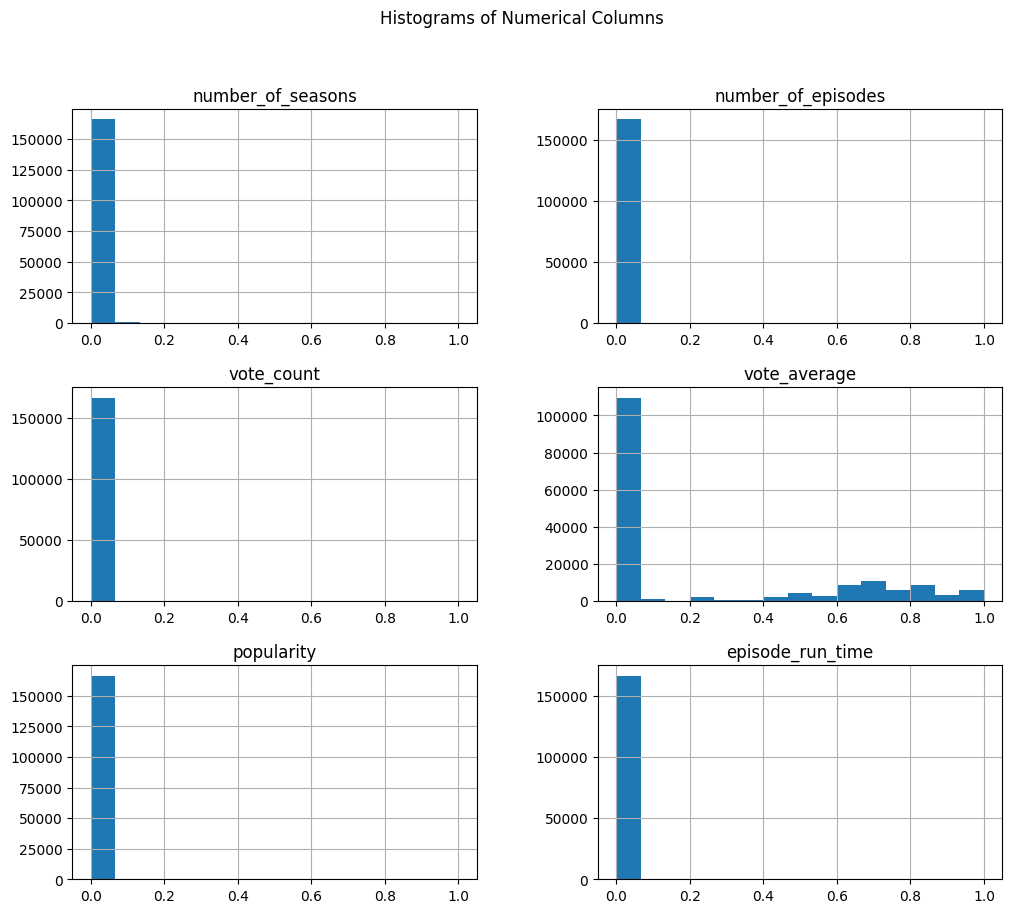

In [ ]:
df[numerical_columns].hist(figsize=(12, 10), bins=15)
plt.suptitle('Histograms of Numerical Columns')
plt.show()

The histograms indicate that most of the numerical columns in your dataset have highly skewed distributions.

A small number of extreme values dominate the range indicating that outliers are present.

We must deal with this to improve our models, so we should do log transformation and look at the outliers to see if we should discard them.

### Suggestions: Log Transformation to potentially aid in skewness, and outlier analysis

## Log Transformation

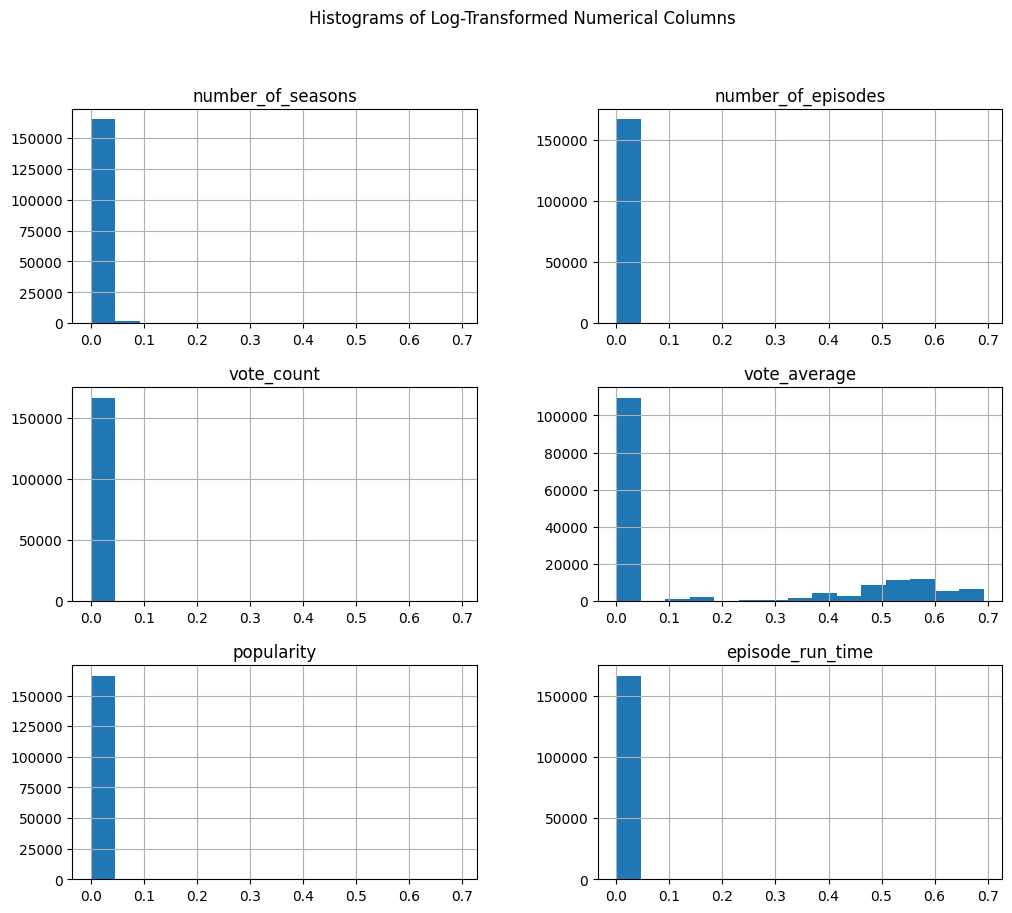

In [ ]:
# Apply log transformation to reduce skewness
df_log = df[numerical_columns].apply(lambda x: np.log1p(x))


# Plotting histograms after log transformation
df_log.hist(figsize=(12, 10), bins=15)
plt.suptitle('Histograms of Log-Transformed Numerical Columns')
plt.show()

When performing Log Transformation, there was not much of a big difference.

It may be more important to do outlier analysis or look at values zero or near zero

### Look into Amount of Zero's / Near Non-zero values

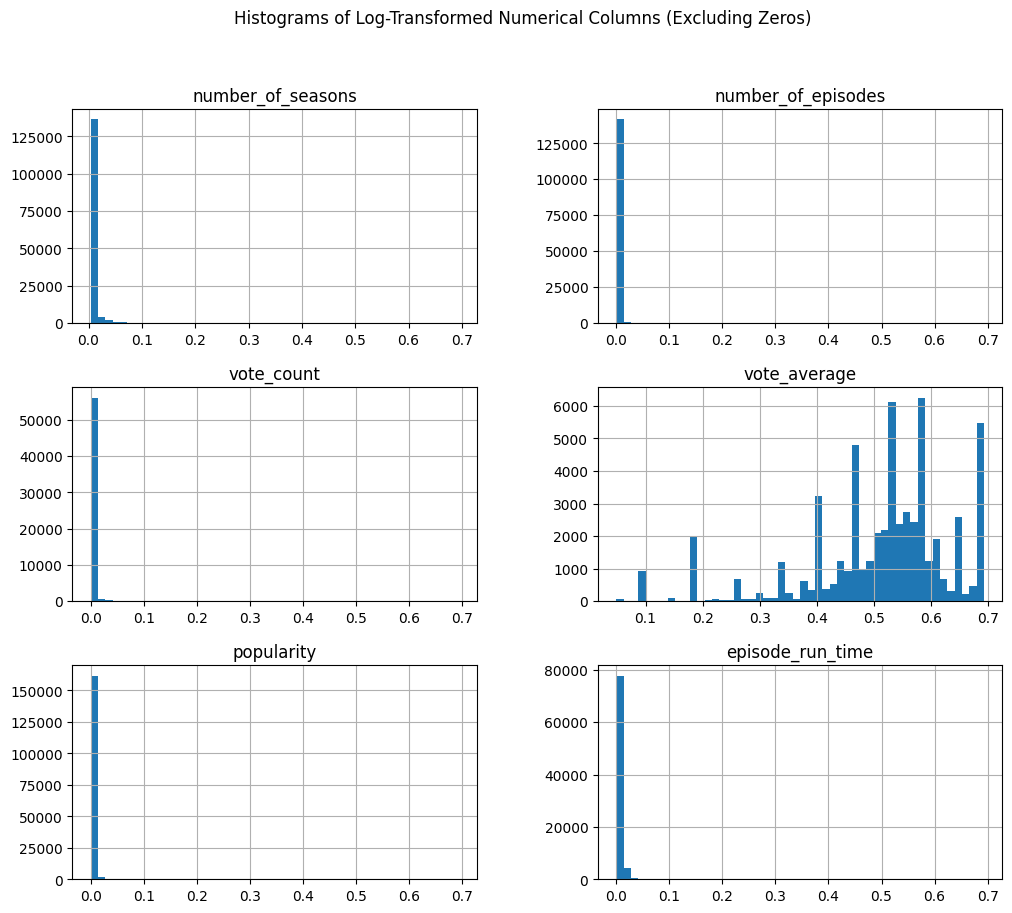

In [ ]:
# Replace zeros with NaN to exclude them temporarily
df_log_nonzero = df_log.replace(0, np.nan)
df_log_nonzero.hist(figsize=(12, 10), bins=50)
plt.suptitle('Histograms of Log-Transformed Numerical Columns (Excluding Zeros)')
plt.show()

In [ ]:
# KDE plot for a specific column
"""for column in df_log.columns:
    sns.kdeplot(df_log[column], shade=True)
    plt.title(f'KDE Plot for {column}')
    plt.show()
"""

"for column in df_log.columns:\n    sns.kdeplot(df_log[column], shade=True)\n    plt.title(f'KDE Plot for {column}')\n    plt.show()\n"

## Count / Percentage Near Zero

In [ ]:
threshold = 0.001

near_zero_counts = {}

for col in numerical_columns:
    count_near_zero = df[df[col] <= threshold].shape[0]
    percentage_near_zero = (count_near_zero / df.shape[0]) * 100
    near_zero_counts[col] = {'count': count_near_zero, 'percentage': percentage_near_zero}

near_zero_df = pd.DataFrame.from_dict(near_zero_counts, orient='index')
near_zero_df.columns = ['Count Near Zero (below 0.001)', 'Percentage Near Zero']

print(near_zero_df)

                    Count Near Zero (below 0.001)  Percentage Near Zero
number_of_seasons                           22426             13.301857
number_of_episodes                         128265             76.079671
vote_count                                 159474             94.591116
vote_average                               109593             65.004478
popularity                                 135736             80.511053
episode_run_time                            86072             51.053128


## Outlier Analysis (Using Interquartile Method)

In [ ]:
# Descriptive statistics for the log-transformed columns
print("\nDescriptive Statistics for Log-Transformed Columns:")
print(df_log.describe())


Descriptive Statistics for Log-Transformed Columns:
       number_of_seasons  number_of_episodes     vote_count   vote_average  \
count      167059.000000       167059.000000  167059.000000  167059.000000   
mean            0.006377            0.001163       0.000583       0.176610   
std             0.011421            0.005688       0.007459       0.255402   
min             0.000000            0.000000       0.000000       0.000000   
25%             0.004158            0.000048       0.000000       0.000000   
50%             0.004158            0.000288       0.000000       0.000000   
75%             0.004158            0.000959       0.000046       0.470004   
max             0.693147            0.693147       0.693147       0.693147   

          popularity  episode_run_time  
count  167059.000000     167059.000000  
mean        0.001547          0.003745  
std         0.009696          0.007209  
min         0.000000          0.000000  
25%         0.000162          0.000000 

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))

# Number of outliers in each column
outliers_count = outliers.sum()
print("Number of Outliers in each column:\n", outliers_count)

Number of Outliers in each column:
 number_of_seasons     54469
number_of_episodes    16736
vote_count            26221
vote_average              0
popularity            24071
episode_run_time       2945
dtype: int64


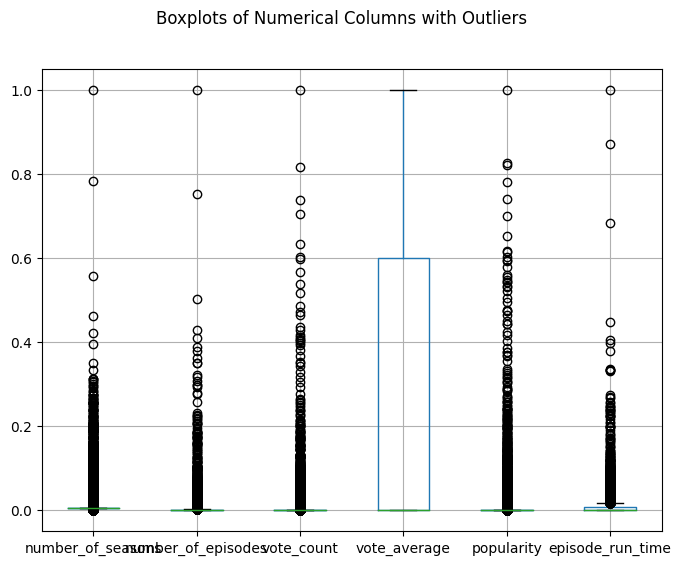

In [ ]:
#Box plot
df[numerical_columns].boxplot(figsize=(8, 6))
plt.suptitle('Boxplots of Numerical Columns with Outliers')
plt.show()

### Question for Challenge Advisor:

How to deal with Outliers when a lot of the numerical columns are near 0?
- Winsorize, Remove, etc.

## Further Visualizations

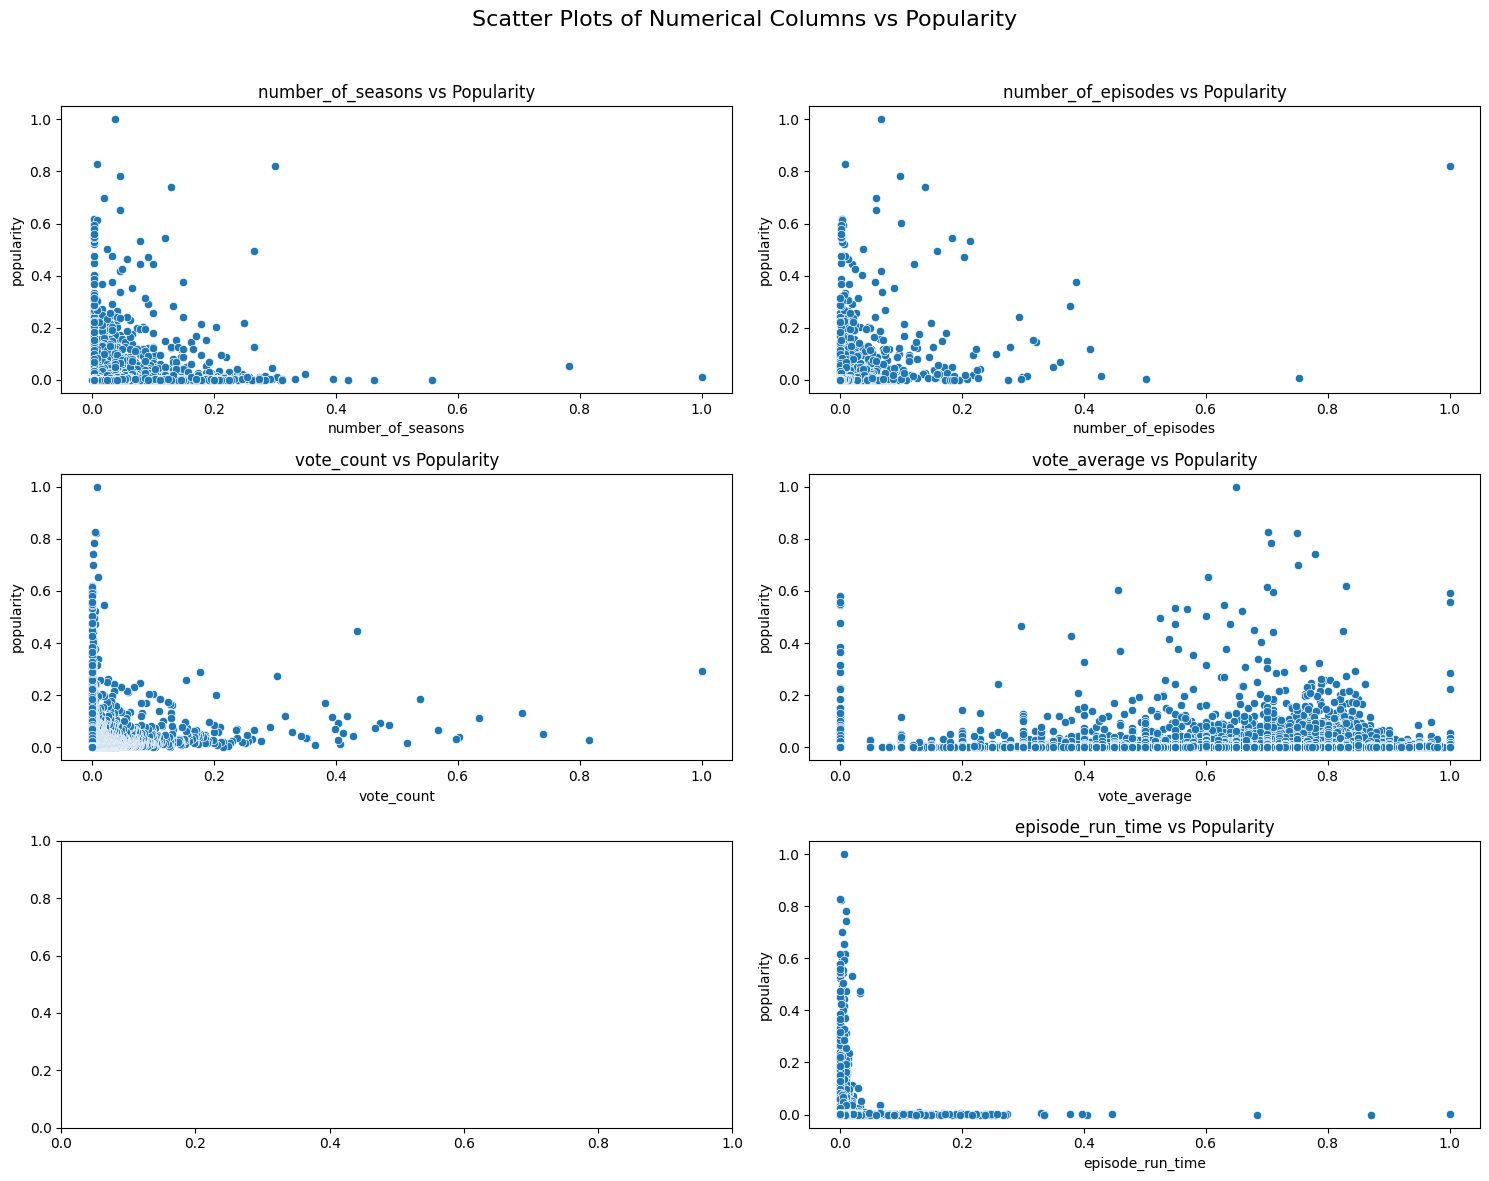

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  # 3 rows, 2 columns layout
fig.suptitle('Scatter Plots of Numerical Columns vs Popularity', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each scatter plot in a subplot
for i, col in enumerate(numerical_columns):
    if col != 'popularity':  # Skip 'popularity' as we are comparing against it
        sns.scatterplot(x=df[col], y=df['popularity'], ax=axes[i])
        axes[i].set_title(f'{col} vs Popularity')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('popularity')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

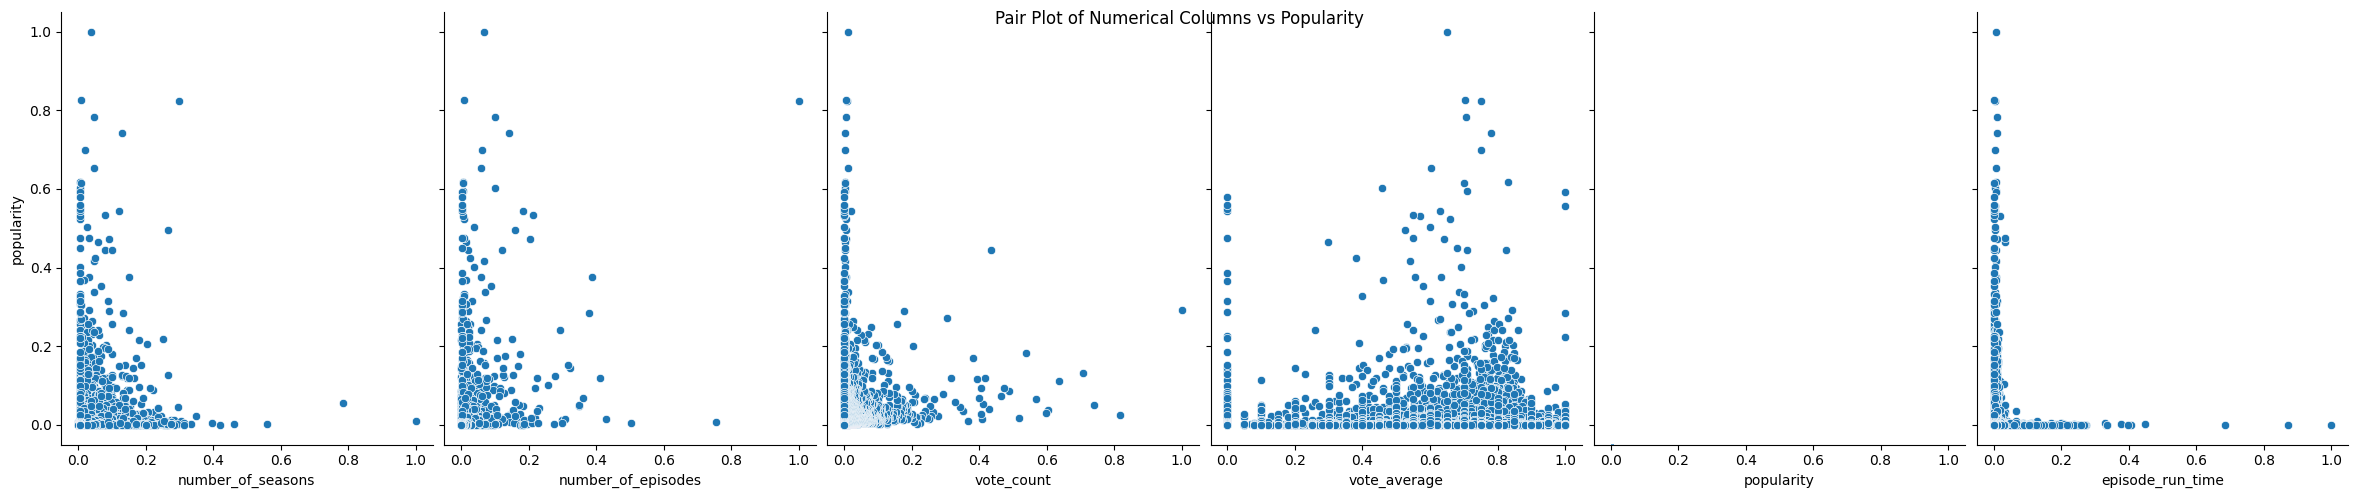

In [ ]:
sns.pairplot(df, x_vars=numerical_columns, y_vars=['popularity'], height=5, aspect=0.8)
plt.suptitle('Pair Plot of Numerical Columns vs Popularity')
plt.show()

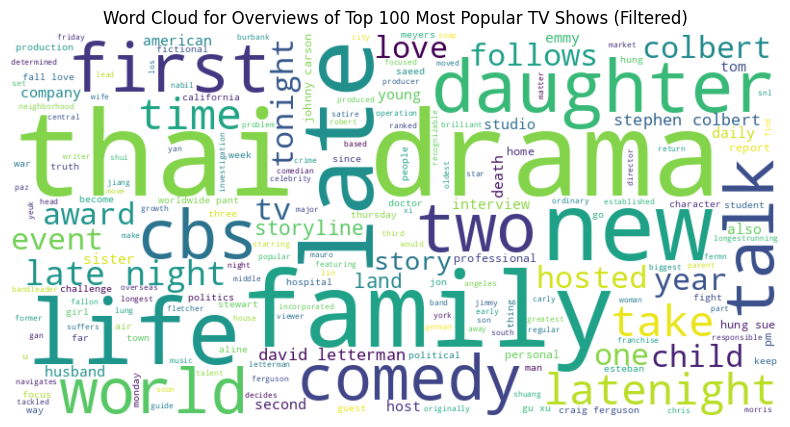

In [ ]:
from wordcloud import WordCloud

top_100_df = df.sort_values(by='popularity', ascending=False).head(100)
top_100_df_cleaned = top_100_df[top_100_df['cleaned_overview'].notna()]

# Combine all text in the 'overview' column into a single string
text = ' '.join(top_100_df_cleaned['cleaned_overview'].astype(str))

STOPWORDS = []
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'show', 'series', 'television', 'episode', 'television series',
    'and', 'is', 'a', 'of', 'the', 'to', 'from', 'as', 'in', 'with', 'it', 'was', 'her', 'she', 'his', 'has', 'by', 'on', 'at', 'he', 'that',
    'an', 'who', 'its', 'after', 'program'
])

# Generate the word cloud for the top 50 shows
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=200, stopwords=custom_stopwords).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for better visualization
plt.title('Word Cloud for Overviews of Top 100 Most Popular TV Shows (Filtered)')
plt.show()

# Using NLP (keyword matching) to predict genre from the overview

As you can see from the graph below, we have a significant number of missing genre values. So, we will use keyword matching to predict the genre. This is first out of 3 steps - (1) classical NLP, (2) LLM like BERT, (3) using a preexisting LLM API openai or an opensource LLM from HuggingFace 

In [ ]:
print(df.isnull().sum())

### Loading a spaCy model 

spaCY provides natural language processing (NLP) functionalities, such as tokenization, stopword removal, and lemmatization

In [ ]:

import spacy

# Print the number of missing genres with an available overview
missing_genres = df[df['genre'].isnull() & df['overview'].notnull()]
print(f"Missing genre values with an overview: {len(missing_genres)}")

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")


### Preprocessing 

In [ ]:
# Preprocess function: tokenize, remove stopwords, and lemmatize
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Apply preprocessing to all rows (not just missing genres)
df['cleaned_overview'] = df['overview'].apply(preprocess_text)

### keyword matching 

In [ ]:
# Define a dictionary with genres and corresponding keywords
# Define a dictionary with genres and corresponding keywords
genre_keywords = {
    'Action & Adventure': ['fight', 'battle', 'war', 'hero', 'explosion', 'adventure', 'quest', 'journey'],
    'Animation': ['animated', 'cartoon', 'drawing', 'anime', 'cgi', 'animation', 'pixar', 'disney'],
    'Comedy': ['funny', 'humor', 'comedy', 'joke', 'laugh', 'parody', 'satire', 'hilarious'],
    'Crime': ['detective', 'murder', 'police', 'criminal', 'robbery', 'heist', 'gang', 'crime'],
    'Documentary': ['documentary', 'true story', 'biography', 'real events', 'non-fiction'],
    'Drama': ['drama', 'emotional', 'serious', 'family', 'relationship', 'conflict'],
    'Family': ['family', 'kids', 'parent', 'children', 'home', 'love', 'domestic'],
    'History': ['historical', 'past', 'medieval', 'war', 'ancient', 'empire', 'revolution'],
    'Kids': ['children', 'kids', 'young', 'fun', 'adventure', 'family'],
    'Music': ['music', 'band', 'singer', 'song', 'concert', 'performance'],
    'Musical': ['musical', 'song', 'dance', 'performance', 'broadway', 'theatre', 'show'],
    'Mystery': ['mystery', 'detective', 'crime', 'whodunit', 'puzzle', 'clue', 'suspense'],
    'News': ['news', 'breaking', 'headline', 'report', 'journalist', 'anchor', 'current events'],
    'Reality': ['reality', 'real life', 'contest', 'competition', 'unscripted', 'reality show'],
    'Romance': ['love', 'romantic', 'relationship', 'heart', 'affair', 'couple'],
    'Sci-Fi & Fantasy': ['space', 'alien', 'robot', 'futuristic', 'time travel', 'fantasy', 'magic', 'dragon'],
    'Soap': ['soap opera', 'drama', 'romance', 'affairs', 'family', 'betrayal', 'melodrama'],
    'Talk': ['talk show', 'interview', 'discussion', 'host', 'celebrity', 'guest', 'panel'],
    'Unknown': ['unknown', 'undefined', 'not classified', 'unidentified', 'other'],
    'War & Politics': ['war', 'battle', 'soldier', 'politics', 'government', 'military', 'conflict', 'revolution'],
    'Western': ['cowboy', 'western', 'sheriff', 'outlaw', 'desert', 'gunfight', 'frontier', 'wild west']
}

#having multiple genres - what to do? 

# Function to assign genre based on keywords
def assign_genre(text):
    for genre, keywords in genre_keywords.items():
        for keyword in keywords:
            if keyword in text:
                return genre
    return 'Unknown'  # If no match is found

### Applying the Function & Calculating Accuracy 

In [ ]:
# Apply preprocessing to all rows (not just missing genres)
df['cleaned_overview'] = df['overview'].apply(preprocess_text)

# Predict genres for all rows (even the ones that already have genres)
df['predicted_genre'] = df['cleaned_overview'].apply(assign_genre)

# Check how many predicted genres match the actual genres
df['match'] = df['genre'] == df['predicted_genre']

# Calculate the accuracy for rows where the actual genre exists
accuracy = df[df['genre'].notnull()]['match'].mean()
print(f"Prediction accuracy: {accuracy * 100:.2f}%")


In [ ]:
#Next Step: Finetuning 
#Adjust Keywords as needed based on accuracy 

### Fill missing genres and save 

In [ ]:
# Only fill missing genre values with the predicted genre
df['genre'] = df['genre'].fillna(df['predicted_genre'])

# Save the updated dataframe to a new CSV file
df.to_csv('updated_dataset.csv', index=False)

# Check the final few rows to see if genres have been filled
print(df[['overview', 'genre', 'predicted_genre']].tail())
